# Asynchronous Task 2 - Machine Learning
---

あなたは何が起こっても、諦めるべきではありません !!

(Kamu seharusnya tidak menyerah terhadap apapun yang terjadi padamu).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Modulus

In [2]:
import time
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [37]:
import pandas as pd
import string, re


!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.7 MB/s eta 0:00:00


## Data Description

- Sentiment : label of dataset (Positive or Negative)
- Customer Review : Raw data of customer review
- corpus : Lowercase version of Customer Review


## Load Data

In [3]:
pth = '/content/drive/MyDrive/Machine Learning/Asynchronous Task/Tugas Classification/'

In [48]:
df = pd.read_csv(pth+'sample_data.csv')
print(df.shape)
df.head()

(1200, 3)


,Sentiment,Customer Review,corpus
0,Positive,"Barang bagus, pengiriman juga cepat. Cuma minu...","barang bagus, pengiriman juga cepat. cuma minu..."
1,Positive,LENGKAP BAGUS PENGIRIMAN CEPAT DAN TEPAT TERPE...,lengkap bagus pengiriman cepat dan tepat terpe...
2,Positive,"Bahan tipis, seller ramah, ekspedisi cpt","bahan tipis, seller ramah, ekspedisi cpt"
3,Positive,produk asli original. suplemen bagus tanpa efe...,produk asli original. suplemen bagus tanpa efe...
4,Positive,Model dan warna aku suka tp pemasangan sedikit...,model dan warna aku suka tp pemasangan sedikit...


## Preprocessing

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sentiment        1200 non-null   object
 1   Customer Review  1200 non-null   object
 2   corpus           1200 non-null   object
dtypes: object(3)
memory usage: 28.2+ KB


In [50]:
cols = ['Sentiment','Customer Review']
df = df[cols]
df = df.dropna()
print(df.shape)
df.head()

(1200, 2)


,Sentiment,Customer Review
0,Positive,"Barang bagus, pengiriman juga cepat. Cuma minu..."
1,Positive,LENGKAP BAGUS PENGIRIMAN CEPAT DAN TEPAT TERPE...
2,Positive,"Bahan tipis, seller ramah, ekspedisi cpt"
3,Positive,produk asli original. suplemen bagus tanpa efe...
4,Positive,Model dan warna aku suka tp pemasangan sedikit...


In [11]:
df.Sentiment.value_counts()

Sentiment
Positive    600
Negative    600
Name: count, dtype: int64

In [51]:
# mencari data dengan review lebih dari 1 kata
df = df[(df['Customer Review'].str.split().str.len())>1]
print(df.shape)
print(df.head())

(1182, 2)
  Sentiment                                    Customer Review
0  Positive  Barang bagus, pengiriman juga cepat. Cuma minu...
1  Positive  LENGKAP BAGUS PENGIRIMAN CEPAT DAN TEPAT TERPE...
2  Positive           Bahan tipis, seller ramah, ekspedisi cpt
3  Positive  produk asli original. suplemen bagus tanpa efe...
4  Positive  Model dan warna aku suka tp pemasangan sedikit...


In [57]:
df['corpus'] = df['Customer Review'].str.lower()
print(df.shape)
df.head()

(1182, 3)


,Sentiment,Customer Review,corpus
0,Positive,"Barang bagus, pengiriman juga cepat. Cuma minu...","barang bagus, pengiriman juga cepat. cuma minu..."
1,Positive,LENGKAP BAGUS PENGIRIMAN CEPAT DAN TEPAT TERPE...,lengkap bagus pengiriman cepat dan tepat terpe...
2,Positive,"Bahan tipis, seller ramah, ekspedisi cpt","bahan tipis, seller ramah, ekspedisi cpt"
3,Positive,produk asli original. suplemen bagus tanpa efe...,produk asli original. suplemen bagus tanpa efe...
4,Positive,Model dan warna aku suka tp pemasangan sedikit...,model dan warna aku suka tp pemasangan sedikit...


In [53]:
df['corpus'] = df.corpus.str.translate(str.maketrans('', '', string.punctuation))
print(df.shape)
df.head()

(1182, 3)


,Sentiment,Customer Review,corpus
0,Positive,"Barang bagus, pengiriman juga cepat. Cuma minu...",barang bagus pengiriman juga cepat cuma minus ...
1,Positive,LENGKAP BAGUS PENGIRIMAN CEPAT DAN TEPAT TERPE...,lengkap bagus pengiriman cepat dan tepat terpe...
2,Positive,"Bahan tipis, seller ramah, ekspedisi cpt",bahan tipis seller ramah ekspedisi cpt
3,Positive,produk asli original. suplemen bagus tanpa efe...,produk asli original suplemen bagus tanpa efek...
4,Positive,Model dan warna aku suka tp pemasangan sedikit...,model dan warna aku suka tp pemasangan sedikit...


In [54]:
def repetition_char(txt):
  sub_str = re.findall(r"((\w)\2{2,})",txt)
  for x in sub_str:
    txt = txt.replace(x[0],x[1])
  return txt

In [55]:
df['corpus'] = df.corpus.apply(repetition_char)
df = df.reset_index(drop=True)
print(df.shape)
df.head()

(1182, 3)


,Sentiment,Customer Review,corpus
0,Positive,"Barang bagus, pengiriman juga cepat. Cuma minu...",barang bagus pengiriman juga cepat cuma minus ...
1,Positive,LENGKAP BAGUS PENGIRIMAN CEPAT DAN TEPAT TERPE...,lengkap bagus pengiriman cepat dan tepat terpe...
2,Positive,"Bahan tipis, seller ramah, ekspedisi cpt",bahan tipis seller ramah ekspedisi cpt
3,Positive,produk asli original. suplemen bagus tanpa efe...,produk asli original suplemen bagus tanpa efek...
4,Positive,Model dan warna aku suka tp pemasangan sedikit...,model dan warna aku suka tp pemasangan sedikit...


In [59]:
import tqdm

factory = StemmerFactory()
stemmer = factory.create_stemmer()

df['corpus'] = df.corpus.apply(lambda x: stemmer.stem(str(x)))
print(df.shape)
print(df.head())

(1182, 3)
  Sentiment                                    Customer Review  \
0  Positive  Barang bagus, pengiriman juga cepat. Cuma minu...   
1  Positive  LENGKAP BAGUS PENGIRIMAN CEPAT DAN TEPAT TERPE...   
2  Positive           Bahan tipis, seller ramah, ekspedisi cpt   
3  Positive  produk asli original. suplemen bagus tanpa efe...   
4  Positive  Model dan warna aku suka tp pemasangan sedikit...   

                                              corpus  
0  barang bagus kirim juga cepat cuma minus di pa...  
1  lengkap bagus kirim cepat dan tepat terpercaya...  
2             bahan tipis seller ramah ekspedisi cpt  
3  produk asli original suplemen bagus tanpa efek...  
4  model dan warna aku suka tp pasang sedikit rib...  


## Generate Sentiment Label

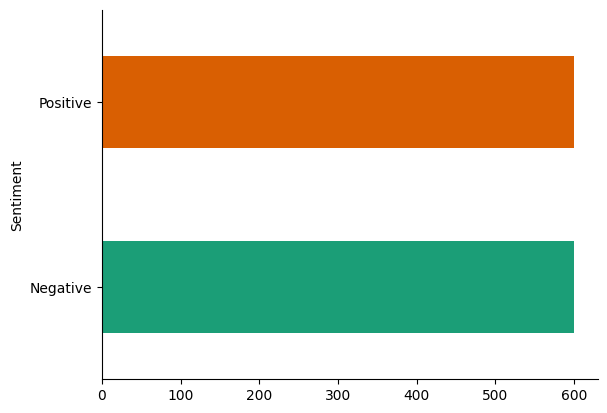

In [5]:
# Sentiment Of Customer Review

df.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [13]:
df.columns.values

array(['Sentiment', 'Customer Review', 'corpus'], dtype=object)

In [14]:
df.isnull().sum()

Sentiment          0
Customer Review    0
corpus             0
dtype: int64

In [15]:
df = df.dropna()
print(df.shape)
print(df.Sentiment.value_counts())

(1200, 3)
Sentiment
Positive    600
Negative    600
Name: count, dtype: int64


In [16]:
x, y =df.corpus, df.Sentiment

## Creating Model

In [23]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(x)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
print("train size:",x_train.shape)
print("test size:",x_test.shape)

train size: (840, 3680)
test size: (360, 3680)


In [25]:
# Assume x_train, y_train, x_test, and y_test are defined here

st = time.time()  # use time.time() to get the current time in seconds since the epoch

model = svm.SVC()  # use svm.SVC() to create an instance of the SVC class
model.fit(x_train, y_train)

print("[DONE] training process finished:", time.time() - st, "second(s)\n")

y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

[DONE] training process finished: 0.12213444709777832 second(s)

              precision    recall  f1-score   support

    Negative       0.88      0.98      0.93       183
    Positive       0.97      0.86      0.92       177

    accuracy                           0.92       360
   macro avg       0.93      0.92      0.92       360
weighted avg       0.93      0.92      0.92       360

[[179   4]
 [ 24 153]]
